In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
dataset = pd.read_csv("D:\Studies\Machine_Learning\Assignment_1\house_price_dataset\\train.csv")
dataset.drop(columns=['Id'], axis=1, inplace=True)
#,'Alley','PoolQC','Fence','MiscFeature'
dataset = dataset.fillna(-1)
dataset.head()
#dataset.isna().sum().sum()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,Inside,...,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,FR2,...,0,-1,-1,-1,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,-1,IR1,Lvl,AllPub,Inside,...,0,-1,-1,-1,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,-1,IR1,Lvl,AllPub,Corner,...,0,-1,-1,-1,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,-1,IR1,Lvl,AllPub,FR2,...,0,-1,-1,-1,0,12,2008,WD,Normal,250000


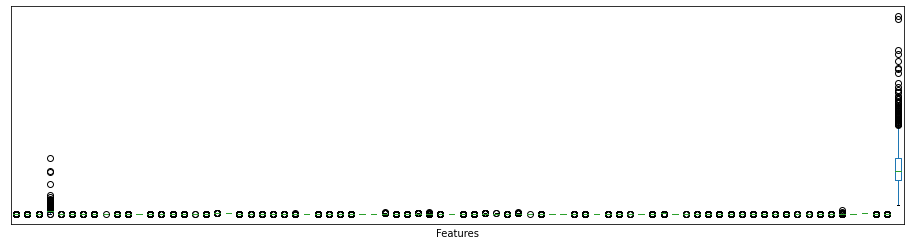

In [3]:
def dropOverrep(df,thresh):
    numSamples = df.shape[0]
    cols = df.columns
    for col in cols:
        if max(df[col].value_counts()) >= round(thresh*numSamples):
            df.drop(columns = col,axis=1, inplace=True)
    return df
        
    
thresh = 1 #20 gets 80% with just neighborhood
dataset = dropOverrep(dataset,thresh)

#identify all categorical variables
cat_columns = dataset.select_dtypes(['object']).columns
#convert all categorical variables to numeric
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: pd.factorize(x)[0])

def remove_outlier(df_in, cols):
    for col_name in cols:
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high),:]
    return df_out

#cols = dataset.columns.tolist()
#print(cols)
#dataset = remove_outlier(dataset,cols)

fig, ax = plt.subplots(figsize=(16,4))
boxplot = dataset.boxplot(ax=ax)
plt.xticks([])
plt.yticks([])
ax.set_xlabel('Features')

x = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

Text(0.5, 0, 'Features')

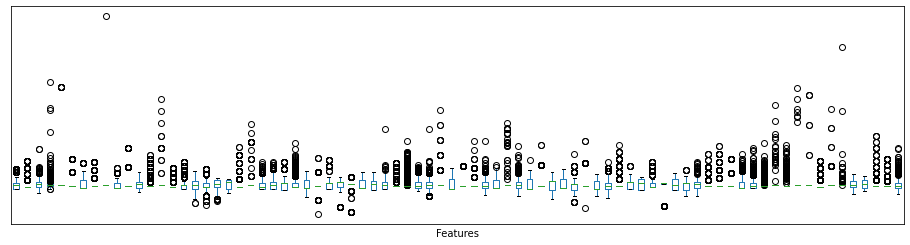

In [4]:
mean_x_train = x_train.mean()
std_x_train = x_train.std()
min_x_train = x_train.min()
max_x_train = x_train.max()

mean_y_train = y_train.mean()
std_y_train = y_train.std()
min_y_train = y_train.min()
max_y_train = y_train.max()

mean_x_test = x_test.mean()
std_x_test = x_test.std()
min_x_test = x_test.min()
max_x_test = x_test.max()

mean_y_test = y_test.mean()
std_x_test = x_test.std()
min_y_test = y_test.min()
max_y_test = y_test.max()

#min-max normalization
#x_train=(x_train-min_x_train)/(max_x_train-min_x_train)
#y_train=(y_train-min_y_train)/(max_y_train-min_y_train)
#x_test=(x_test-min_x_train)/(max_x_train-min_x_train)
#y_test=(y_test-min_y_train)/(max_y_train-min_y_train)

#mean-std normalization
x_train=(x_train-mean_x_train)/std_x_train
y_train=(y_train-mean_y_train)/std_y_train
x_test=(x_test-mean_x_train)/std_x_train
y_test=(y_test-mean_y_train)/std_y_train

#mean normalization
#x_train=(x_train-mean_x_train)
#y_train=(y_train-mean_y_train)
#x_test=(x_test-mean_x_train)
#y_test=(y_test-mean_y_train)

temp1 = pd.concat([x_train,x_test],axis=0)
temp2 = pd.concat([y_train,y_test],axis=0)
dataset = pd.concat([temp1,temp2],axis=1)

fig, ax = plt.subplots(figsize=(16,4))
boxplot = dataset.boxplot(ax=ax)
plt.xticks([])
plt.yticks([])
ax.set_xlabel('Features')

In [5]:
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

x_train shape :  (1168, 79)
x_test shape :  (292, 79)
y_train shape :  (1168, 1)
y_test shape :  (292, 1)


In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)

In [7]:
preds = lr.predict(x_test)*std_y_train.to_numpy()+mean_y_train.to_numpy()
groundTruth = y_test.to_numpy()*std_y_train.to_numpy()+mean_y_train.to_numpy()

#preds = lr.predict(x_test)+mean_y_train.to_numpy()
#groundTruth = y_test.to_numpy()+mean_y_train.to_numpy()

#preds = lr.predict(x_test)*(max_y_train-min_y_train).to_numpy()+min_y_train.to_numpy()
#groundTruth = y_test.to_numpy()*(max_y_train-min_y_train).to_numpy()+min_y_train.to_numpy()

mse = np.mean(((preds - groundTruth)**2))
rmse = np.sqrt(mse)
mae = np.mean(abs(preds - groundTruth))
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', acc)

MSE: 739650165.2559471
RMSE: 27196.510166856835
MAE: 18940.706023865994
R2: 0.8962905163141736


C:\Users\omart\AppData\Local\Temp/ipykernel_22432/961614549.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  en.fit(x_train,y_train)
C:\Users\omart\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\omart\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.05635416638691, tolerance: 0.11670000000000005
  model = cd_fast.enet_coordinate_descent(
C:\Users\omart\AppData\Local\Temp/ipykernel_22432/961614549.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  en.fit(x_train,y_train)
C:\Users\omart\anaconda3\lib\site-

C:\Users\omart\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136.11713066934075, tolerance: 0.11670000000000005
  model = cd_fast.enet_coordinate_descent(
C:\Users\omart\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.59123686860934, tolerance: 0.11670000000000005
  model = cd_fast.enet_coordinate_descent(
C:\Users\omart\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148.70456634155005, tolerance: 0.11670000000000005
  model = cd_fast.enet_coordinate_descent(
C:\Users\omart\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

MSE: 13085248443.100765
RMSE: 114390.77079511601
MAE: 83252.3882700333
R2: 0.8962726221596714


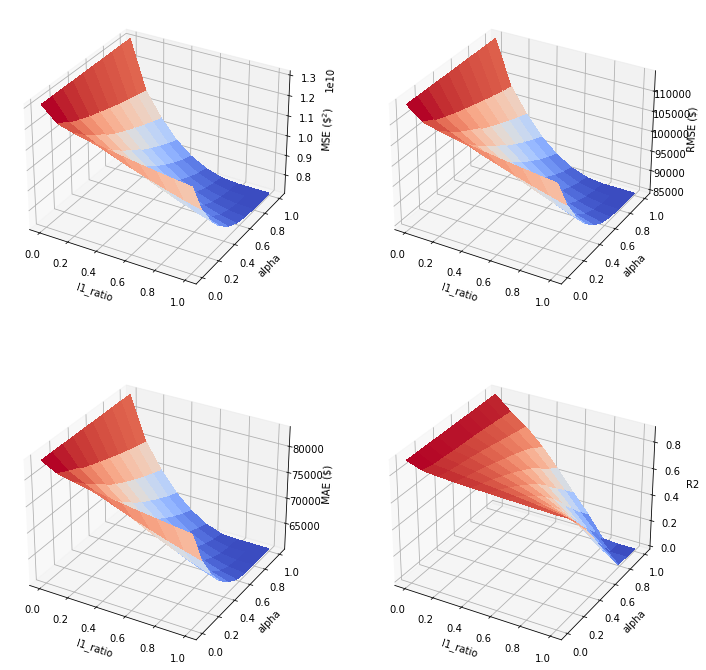

In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression

l1_ratio = np.linspace(0.0,1.0,10)
alpha = np.linspace(0.0,1.0,10)
l1 = l1_ratio*alpha
l2 = alpha-l1

acc = np.empty([len(l1_ratio),len(alpha)])
mse = np.empty([len(l1_ratio),len(alpha)])
rmse = np.empty([len(l1_ratio),len(alpha)])
mae = np.empty([len(l1_ratio),len(alpha)])
for a in range(len(alpha)):
    for l in range(len(l1_ratio)):
        en = ElasticNet(alpha=alpha[a],l1_ratio=l1_ratio[l])
        en.fit(x_train,y_train)
        preds = en.predict(x_test)*std_y_train.to_numpy()+mean_y_train.to_numpy()
        groundTruth = y_test.to_numpy()*std_y_train.to_numpy()+mean_y_train.to_numpy()
        acc[l,a] = en.score(x_test,y_test)
        mse[l,a] = np.mean(((preds - groundTruth)**2))
        rmse[l,a] = np.sqrt(mse[l,a])
        mae[l,a] = np.mean(abs(preds - groundTruth))
        
X,Y = np.meshgrid(l1_ratio, alpha)
fig, axs = plt.subplots(2,2, subplot_kw={"projection": "3d"},figsize=(12,12))

#from matplotlib import ticker
#niceMathTextForm = ticker.ScalarFormatter()
#niceMathTextForm.set_powerlimits((-10, 10))
#niceMathTextForm.set_useOffset(True)

surf = axs[0,0].plot_surface(X, Y, mse, cmap=cm.coolwarm,linewidth=0, antialiased=False)
axs[0,0].set_xlabel('l1_ratio')
axs[0,0].set_ylabel('alpha')
axs[0,0].set_zlabel('MSE ($\$^2$)')
#axs[0,0].w_zaxis.set_major_formatter(niceMathTextForm)

surf = axs[0,1].plot_surface(X, Y, rmse, cmap=cm.coolwarm,linewidth=0, antialiased=False)
axs[0,1].set_xlabel('l1_ratio')
axs[0,1].set_ylabel('alpha')
axs[0,1].set_zlabel('RMSE ($)')
#axs[0,1].w_zaxis.set_major_formatter(niceMathTextForm)

surf = axs[1,0].plot_surface(X, Y, mae, cmap=cm.coolwarm,linewidth=0, antialiased=False)
axs[1,0].set_xlabel('l1_ratio')
axs[1,0].set_ylabel('alpha')
axs[1,0].set_zlabel('MAE ($)')
#axs[1,0].w_zaxis.set_major_formatter(niceMathTextForm)

surf = axs[1,1].plot_surface(X, Y, acc, cmap=cm.coolwarm,linewidth=0, antialiased=False)
axs[1,1].set_xlabel('l1_ratio')
axs[1,1].set_ylabel('alpha')
axs[1,1].set_zlabel('R2')
#axs[1,1].w_zaxis.set_major_formatter(niceMathTextForm)

idx1 = 0
idx2 = 0
print('MSE:', mse[idx1,idx2])
print('RMSE:', rmse[idx1,idx2])
print('MAE:', mae[idx1,idx2])
print('R2:', acc[idx1,idx2])

In [29]:
l1 = 0.0
l2 = 1.0
alpha = l1+l2
l1_ratio = l1/alpha

en = ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
en.fit(x_train,y_train)
preds = en.predict(x_test)*std_y_train.to_numpy()+mean_y_train.to_numpy()
groundTruth = y_test.to_numpy()*std_y_train.to_numpy()+mean_y_train.to_numpy()
acc = en.score(x_test,y_test)
mse = np.mean(((preds - groundTruth)**2))
rmse = np.sqrt(mse)
mae = np.mean(abs(preds - groundTruth))
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', acc)

MSE: 11265442366.446924
RMSE: 106138.7882277112
MAE: 77749.9000492349
R2: 0.812860791809948


C:\Users\omart\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.05907683271425, tolerance: 0.11670000000000005
  model = cd_fast.enet_coordinate_descent(
